# EDA - Glassdoor Reviews

### Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 1. EDA Full Dataset

### Load the Dataset

In [2]:
#Load the data
reviews = pd.read_csv('glassdoor_reviews.csv')
reviews.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
0,AFH-Wealth-Management,2015-04-05,,Current Employee,NaN,2,4.0,3.0,NaN,2.0,3.0,3.0,x,o,r,"Young colleagues, poor micro management",Very friendly and welcoming to new staff. Easy...,"Poor salaries, poor training and communication."
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
3,AFH-Wealth-Management,2016-04-16,,Current Employee,NaN,5,2.0,3.0,NaN,2.0,2.0,3.0,x,o,r,Over promised under delivered,Nice staff to work with,No career progression and salary is poor
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."


### Dataset Overview

In [3]:
print("Dataset Shape (rows, columns):", reviews.shape)
print("\nColumns and Data Types:")
print(reviews.dtypes)

Dataset Shape (rows, columns): (838566, 18)

Columns and Data Types:
firm                    object
date_review             object
job_title               object
current                 object
location                object
overall_rating           int64
work_life_balance      float64
culture_values         float64
diversity_inclusion    float64
career_opp             float64
comp_benefits          float64
senior_mgmt            float64
recommend               object
ceo_approv              object
outlook                 object
headline                object
pros                    object
cons                    object
dtype: object


In [4]:
reviews['date_review'] = pd.to_datetime(reviews['date_review'])

### Descriptive statistics for Numeric Columns

In [5]:
print("\nDescriptive Statistics for Numeric Columns:")
print(reviews.describe())


Descriptive Statistics for Numeric Columns:
                         date_review  overall_rating  work_life_balance  \
count                         838566   838566.000000      688672.000000   
mean   2018-01-30 15:03:19.703779584        3.655956           3.375735   
min              2008-01-31 00:00:00        1.000000           1.000000   
25%              2016-04-01 00:00:00        3.000000           2.000000   
50%              2018-08-22 00:00:00        4.000000           4.000000   
75%              2020-09-12 00:00:00        5.000000           4.000000   
max              2021-06-08 00:00:00        5.000000           5.000000   
std                              NaN        1.174684           1.305874   

       culture_values  diversity_inclusion     career_opp  comp_benefits  \
count   647193.000000        136066.000000  691065.000000  688484.000000   
mean         3.590164             3.966612       3.461825       3.398109   
min          1.000000             1.000000       1.

### Descriptive Statistics for Non-Numeric Columns

In [6]:
print("\nDescriptive Statistics for Non-Numeric Columns:")
print(reviews.describe(include='object'))


Descriptive Statistics for Non-Numeric Columns:
          firm            job_title           current  \
count   838566               838566            838566   
unique     428                62275                29   
top        IBM   Anonymous Employee  Current Employee   
freq     60436               162649            209599   

                        location recommend ceo_approv outlook headline  \
count                     541223    838566     838566  838566   835976   
unique                     14486         3          4       4   390454   
top     London, England, England         v          o       v     Good   
freq                       58665    427865     311433  301413    14300   

                             pros                      cons  
count                      838564                    838553  
unique                     778559                    777133  
top     Great company to work for  None that I can think of  
freq                          720             

### Analyzing Missing Values

In [7]:
missing_values = reviews.isnull().sum()
print("\nMissing Values per Column:")
print(missing_values)


Missing Values per Column:
firm                        0
date_review                 0
job_title                   0
current                     0
location               297343
overall_rating              0
work_life_balance      149894
culture_values         191373
diversity_inclusion    702500
career_opp             147501
comp_benefits          150082
senior_mgmt            155876
recommend                   0
ceo_approv                  0
outlook                     0
headline                 2590
pros                        2
cons                       13
dtype: int64


In [8]:
# Calculate percentage of missing values per column
total_entries = len(reviews)
missing_percentage = (missing_values / total_entries) * 100
print("\nPercentage of Missing Values per Column:")
print(missing_percentage)


Percentage of Missing Values per Column:
firm                    0.000000
date_review             0.000000
job_title               0.000000
current                 0.000000
location               35.458509
overall_rating          0.000000
work_life_balance      17.875039
culture_values         22.821459
diversity_inclusion    83.773967
career_opp             17.589671
comp_benefits          17.897458
senior_mgmt            18.588400
recommend               0.000000
ceo_approv              0.000000
outlook                 0.000000
headline                0.308861
pros                    0.000239
cons                    0.001550
dtype: float64


<span style="color: red;">We might want to leave diversity_inclusion out of the analysis.</span>

Text(0.5, 1.0, 'Missing Values Heatmap')

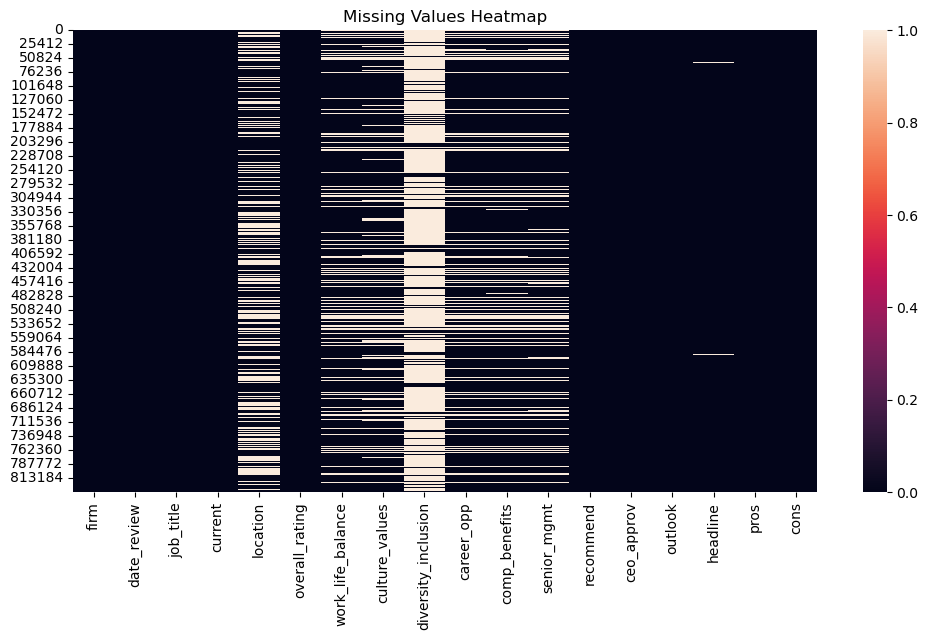

In [9]:
plt.figure(figsize=(12, 6))
sns.heatmap(reviews.isnull(), cbar=True)
plt.title('Missing Values Heatmap')

### Analyzing Duplicates

In [10]:
print("Total duplicate rows:", reviews.duplicated().sum())

Total duplicate rows: 33515


<span style="color: red;">Note that this method only counts as duplicated those rows that have a complete match, meaning every column is exactly the same.</span>

In [11]:
duplicated_reviews = reviews[reviews.duplicated(keep=False)]
duplicated_reviews.head(10)


,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
1231,ASDA,2010-10-29,Asda Manager,Former Employee,NaN,5,5.0,NaN,NaN,5.0,5.0,4.0,v,o,o,bil,"great team work, working together",long hours long shift patterns
1232,ASDA,2010-10-29,Asda Manager,Former Employee,NaN,5,5.0,NaN,NaN,5.0,5.0,4.0,v,o,o,bil,"great team work, working together",long hours long shift patterns
1271,ASDA,2013-04-24,Shop Floor Assistant,"Current Employee, more than 1 year",NaN,4,2.0,4.0,NaN,3.0,4.0,3.0,v,v,v,"Good company to work for, very customer experi...",10% discount on shopping in store and online\r...,Always short staffed with huge targets to hit\...
1272,ASDA,2013-04-24,Shop Floor Assistant,"Current Employee, more than 1 year",NaN,4,2.0,4.0,NaN,3.0,4.0,3.0,v,v,v,"Good company to work for, very customer experi...",10% discount on shopping in store and online\r...,Always short staffed with huge targets to hit\...
1291,ASDA,2013-11-20,Picker,"Current Employee, more than 1 year","London, England, England",3,3.0,3.0,NaN,3.0,3.0,2.0,x,r,r,"Long hours, okay pay, hard work, difficult man...","Flexible hours, people are friendly, shop disc...","Management can be difficult to work with, pres..."
1292,ASDA,2013-11-20,Picker,"Current Employee, more than 1 year","London, England, England",3,3.0,3.0,NaN,3.0,3.0,2.0,x,r,r,"Long hours, okay pay, hard work, difficult man...","Flexible hours, people are friendly, shop disc...","Management can be difficult to work with, pres..."
1337,ASDA,2014-05-24,Shop Floor Assistant (Nights),"Current Employee, more than 8 years","Hinckley, England, England",3,2.0,2.0,NaN,3.0,3.0,3.0,x,r,r,A brief summary of a near 10 year nightshift c...,Friendly colleagues make for a pleasant and re...,Financial constraints and reduction in employe...
1338,ASDA,2014-05-24,Shop Floor Assistant (Nights),"Current Employee, more than 8 years","Hinckley, England, England",3,2.0,2.0,NaN,3.0,3.0,3.0,x,r,r,A brief summary of a near 10 year nightshift c...,Friendly colleagues make for a pleasant and re...,Financial constraints and reduction in employe...
1399,ASDA,2014-06-16,Designer,"Former Employee, less than 1 year","Leeds, England, England",1,2.0,1.0,NaN,1.0,1.0,1.0,x,v,r,"team work is unheard of, you're on your own",I learnt a lot of things there. self time mana...,managment rarely around. I was without a manag...
1400,ASDA,2014-06-16,Designer,"Former Employee, less than 1 year","Leeds, England, England",1,2.0,1.0,NaN,1.0,1.0,1.0,x,v,r,"team work is unheard of, you're on your own",I learnt a lot of things there. self time mana...,managment rarely around. I was without a manag...


In [12]:
duplicates =  reviews.duplicated().sum()
duplicated_percentage = (duplicates / total_entries) * 100
print("\nPercentage of Duplicates:")
print(duplicated_percentage)


Percentage of Duplicates:
3.9967038968906445


<span style="color: red;">Given that it's such a small percentage, we could drop the duplicated rows.</span>

### Most common firms

In [13]:
top_firms = reviews['firm'].value_counts().head(10)
print(top_firms)

firm
IBM           60436
McDonald-s    49450
Deloitte      46995
EY            34050
PwC           33227
Oracle        31941
Microsoft     26675
J-P-Morgan    25814
KPMG          24815
Apple         20797
Name: count, dtype: int64


### Most common locations

In [28]:
unique_locations = reviews['location'].nunique()
print("Number of unique locations:", unique_locations)

Number of unique locations: 14486


In [29]:
locations_per_company = reviews.groupby("firm")["location"].nunique()
print(locations_per_company)

firm
AFH-Wealth-Management     10
AJ-Bell                    7
ALDI                     270
AQA                        6
ASDA                     590
                        ... 
i-Net-Solution             2
ibis                      59
mydentist-UK              55
next                     375
the-LEGO-Group           152
Name: location, Length: 428, dtype: int64


In [30]:
sorted_locations_per_company = locations_per_company.sort_values(ascending=True)
print(sorted_locations_per_company)

firm
Office-of-Rail-Regulation                  1
NPSA                                       1
UKCIL                                      1
National-Offender-Management-Service       2
AlixPartners                               2
                                        ... 
Apple                                   1176
Marriott-International                  1223
IBM                                     1477
Pizza-Hut                               2164
McDonald-s                              6952
Name: location, Length: 428, dtype: int64


In [31]:
top_10_locations = locations_per_company.sort_values(ascending=False).head(10)
print(top_10_locations)

firm
McDonald-s                6952
Pizza-Hut                 2164
IBM                       1477
Marriott-International    1223
Apple                     1176
J-P-Morgan                1136
Tesco                     1084
Deloitte                  1033
PwC                        876
Microsoft                  857
Name: location, dtype: int64


In [14]:
top_locations = reviews['location'].value_counts().head(10)
print(top_locations)

location
London, England, England     58665
New York, NY                 31172
Bangalore                    28102
Hyderābād                    11458
Mumbai                        9543
Gurgaon, Haryana, Haryana     8562
Chicago, IL                   7840
Singapore                     7581
San Francisco, CA             7371
Dublin, Dublin                7364
Name: count, dtype: int64


In [15]:
#Most common locations within England
england_reviews = reviews[reviews['location'].str.contains('England', na=False)]
england_locations = england_reviews['location'].value_counts().head(10)
print("\nMost Common Locations within England:")
print(england_locations)


Most Common Locations within England:
location
London, England, England                        58665
Manchester, England, England                     5619
Birmingham, England, England                     4132
Leeds, England, England                          3279
Bristol, England, England                        2617
Cambridge, East of England, England, England     1763
Newcastle upon Tyne, England, England            1726
Liverpool, England, England                      1635
Reading, England, England                        1571
Nottingham, England, England                     1540
Name: count, dtype: int64


In [16]:
# Most common firms with location = London
london_reviews = reviews[reviews['location'].str.contains('London', na=False)]
london_top_firms = london_reviews['firm'].value_counts().head(10)

print("Top 10 firms with location in London:")
print(london_top_firms)

Top 10 firms with location in London:
firm
Accenture        1852
Barclays         1815
Deloitte         1804
EY               1733
PwC              1685
KPMG             1355
HSBC-Holdings    1218
IBM              1135
Tesco            1072
NHS               966
Name: count, dtype: int64


### Correlation Analysis

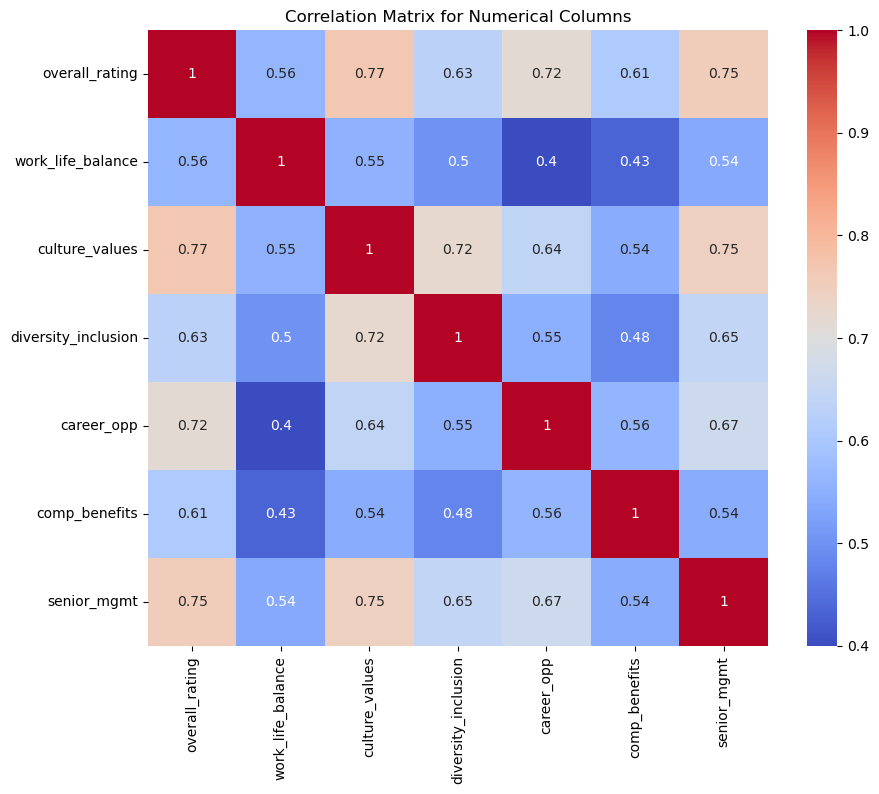

In [17]:
# Select only numerical columns from the DataFrame
numerical_data = reviews.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix for Numerical Columns")
plt.show()

## 2. EDA Filtered Dataset

Filtered for location contains 'England' and date_review is between 2015 and 2025.

In [18]:
#Filter for reviews where location contains "England" 
england_reviews = reviews[reviews['location'].str.contains('England', na=False)]
#Check the first few rows of the filtered DataFrame
england_reviews.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
6,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,r,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...
13,AFH-Wealth-Management,2017-05-21,Administrative Support,"Former Employee, more than 5 years","Birmingham, England, England",1,4.0,1.0,NaN,2.0,4.0,1.0,o,v,v,Administration team,Free parking . Meet some nice people in the te...,Not treated at all well after 6 yrs of being a...


In [19]:
# Filter for reviews between the years 2015 and 2025 (inclusive)
england_recent = england_reviews[(england_reviews['date_review'] >= '2015-01-01') & (england_reviews['date_review'] <= '2025-12-31')].copy()
#Check the first few rows of the filtered DataFrame
england_recent.head()

,firm,date_review,job_title,current,location,overall_rating,work_life_balance,culture_values,diversity_inclusion,career_opp,comp_benefits,senior_mgmt,recommend,ceo_approv,outlook,headline,pros,cons
1,AFH-Wealth-Management,2015-12-11,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",2,3.0,1.0,NaN,2.0,1.0,4.0,x,o,r,"Excellent staff, poor salary","Friendly, helpful and hard-working colleagues",Poor salary which doesn't improve much with pr...
2,AFH-Wealth-Management,2016-01-28,Office Administrator,"Current Employee, less than 1 year","Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,x,"Low salary, bad micromanagement",Easy to get the job even without experience in...,"Very low salary, poor working conditions, very..."
4,AFH-Wealth-Management,2016-04-23,Office Administrator,"Current Employee, more than 1 year","Bromsgrove, England, England",1,2.0,1.0,NaN,2.0,1.0,1.0,x,o,x,client reporting admin,"Easy to get the job, Nice colleagues.","Abysmal pay, around minimum wage. No actual tr..."
6,AFH-Wealth-Management,2016-09-23,IFA,Former Employee,"Bromsgrove, England, England",1,1.0,1.0,NaN,1.0,1.0,1.0,x,o,r,It horrible management,Good investment management strategy. Overall t...,The management and seniors are ruthless. No tr...
13,AFH-Wealth-Management,2017-05-21,Administrative Support,"Former Employee, more than 5 years","Birmingham, England, England",1,4.0,1.0,NaN,2.0,4.0,1.0,o,v,v,Administration team,Free parking . Meet some nice people in the te...,Not treated at all well after 6 yrs of being a...


In [20]:
# Count how many reviews meet both criteria
count_reviews = england_recent.shape[0]
# Print the count
print(f"Number of reviews from England between 2015 and 2025: {count_reviews}")

Number of reviews from England between 2015 and 2025: 127619


<span style="color: red;">We have enough reviews in the England and recent subset to conduct the whole project only on those reviews.</span>

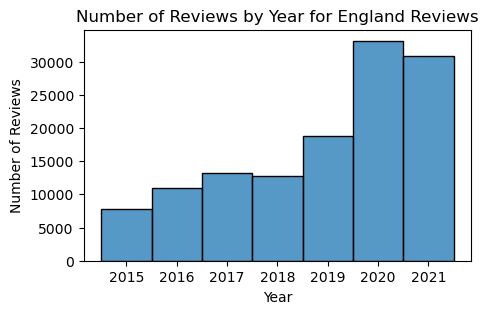

In [21]:
# Extract year from the date_review column
england_recent.loc[:,'year'] = england_recent['date_review'].dt.year

# Create the histogram with seaborn
plt.figure(figsize=(5, 3))
sns.histplot(data=england_recent, x='year', 
             bins=range(england_recent['year'].min(), england_recent['year'].max() + 2), 
             discrete=True)
plt.xlabel("Year")
plt.ylabel("Number of Reviews")
plt.title("Number of Reviews by Year for England Reviews")
plt.show()

### Missing Values

In [22]:
# Analyze missing values in the filtered dataset
missing_values = england_recent.isnull().sum()
# Print the missing values
print("Missing values in the filtered dataset:")
print(missing_values)

Missing values in the filtered dataset:
firm                       0
date_review                0
job_title                  0
current                    0
location                   0
overall_rating             0
work_life_balance      18646
culture_values         18904
diversity_inclusion    96260
career_opp             18361
comp_benefits          18848
senior_mgmt            19278
recommend                  0
ceo_approv                 0
outlook                    0
headline                 382
pros                       1
cons                       3
year                       0
dtype: int64


Here we might need to decide if we exclude other columns that are not pros and cons (work_life_balance, culture_values, diversity_inclusion, etc) or merge them together as one big review and drop the missing values.

Text(0.5, 1.0, 'Missing Values in England_Reviews Heatmap')

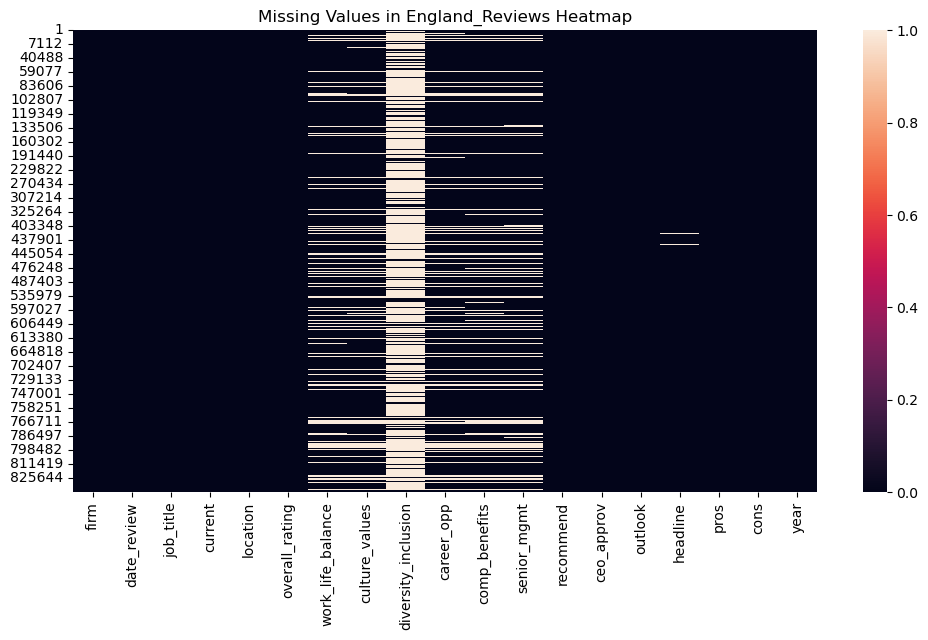

In [23]:
plt.figure(figsize=(12, 6))
sns.heatmap(england_recent.isnull(), cbar=True)
plt.title('Missing Values in England_Reviews Heatmap')

### Duplicates

In [24]:
print("Total duplicate rows:", england_recent.duplicated().sum())

Total duplicate rows: 2278


In [25]:
duplicated_percentage_recent = (england_recent.duplicated().sum() / len(england_recent)) * 100
print("\nPercentage of Duplicates in filtered dataset:")
print(duplicated_percentage_recent)


Percentage of Duplicates in filtered dataset:
1.7850006660450248


### Most common firms with location containing England and date_review between 2015-2025

In [26]:
top_firms_recent = england_recent['firm'].value_counts().head(10)
print(top_firms_recent)

firm
Tesco                5318
McDonald-s           3348
J-Sainsbury          2946
NHS                  2881
Barclays             2345
ASDA                 2208
Marks-and-Spencer    2151
Primark              1909
PwC                  1887
Deloitte             1883
Name: count, dtype: int64


In [27]:
unique_companies = england_recent['firm'].nunique()
print("Number of unique companies:", unique_companies)

Number of unique companies: 416
